### Triangle , Circle , Square splitter
Using keras library

In [45]:
import os
import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from shutil import copyfile

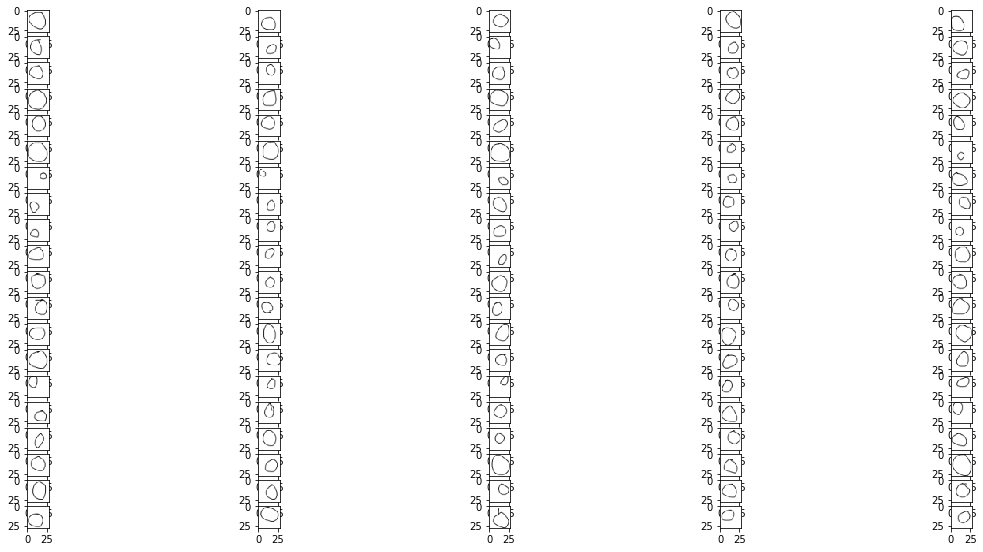

In [27]:
images = []
for img_path in glob.glob('shapes/circles/*.png'):
    images.append(mpimg.imread(img_path))
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)


In [28]:
classifier = Sequential()

In [29]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), padding='same', input_shape = (28, 28, 3), activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # antes era 0.25
# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # antes era 0.25
# Adding a third convolutional layer
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # antes era 0.25
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dropout(0.5)) 
classifier.add(Dense(units = 3, activation = 'softmax'))


In [30]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
__________

In [31]:
# Compiling the CNN
classifier.compile(optimizer = 'rmsprop',
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

In [32]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

### split data into testing and training

In [37]:
classes = ['circle','triangle','square']
data_type = ['train','test']
base_path = 'shapes'
new_path = "data_set"


In [56]:
# make test and train directories
newest_path = os.path.join(new_path,data_type[0])
os.mkdir(newest_path)
for i in range(len(classes)):
    class_path = os.path.join(newest_path,classes[i])
    os.mkdir(class_path)

newest_path = os.path.join(new_path,data_type[1])
os.mkdir(newest_path)
for i in range(len(classes)):
    class_path = os.path.join(newest_path,classes[i])
    os.mkdir(class_path)

split_range = 75
for i in range(len(classes)):
    all_img = os.listdir(os.path.join(base_path, classes[i]))
    
    train_img = all_img[:split_range]
    test_img = all_img[split_range:]
    
    for j in range(len(train_img)):
        original_path = os.path.join(os.path.join(base_path, classes[i]),train_img[j])
        newest_path = os.path.join(os.path.join(os.path.join(new_path,data_type[0]),classes[i]),train_img[j])
        copyfile(original_path,newest_path)
    
    for j in range(len(test_img)):
        original_path = os.path.join(os.path.join(base_path, classes[i]),train_img[j])
        newest_path = os.path.join(os.path.join(os.path.join(new_path,data_type[1]),classes[i]),train_img[j])
        copyfile(original_path,newest_path)
        
    

In [59]:
train_path = os.path.join(new_path,'train')
test_path = os.path.join(new_path,'test')


training_set = train_datagen.flow_from_directory(train_path,target_size = (28,28),batch_size = 16, class_mode ='categorical')
test_set = test_datagen.flow_from_directory(test_path, target_size = (28, 28), batch_size = 16, class_mode = 'categorical')

Found 225 images belonging to 3 classes.
Found 75 images belonging to 3 classes.


In [60]:
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", monitor = 'val_acc', verbose=1, save_best_only=True)

In [61]:
# fit the model
history = classifier.fit_generator(training_set,
                                   steps_per_epoch = 75,
                                   epochs = 20,
                                   callbacks=[checkpointer],
                                   validation_data = test_set,
                                   validation_steps = 50)

classifier.load_weights('best_weights.hdf5')
classifier.save('shapes_cnn.h5')

Epoch 1/20
75/75 [==============================] - 9s 121ms/step - loss: 1.1378 - acc: 0.3339 - val_loss: 1.0995 - val_acc: 0.3333

Epoch 00001: val_acc improved from -inf to 0.33333, saving model to best_weights.hdf5
Epoch 2/20
75/75 [==============================] - 9s 121ms/step - loss: 1.1035 - acc: 0.3068 - val_loss: 1.0988 - val_acc: 0.3333

Epoch 00002: val_acc improved from 0.33333 to 0.33333, saving model to best_weights.hdf5
Epoch 3/20
75/75 [==============================] - 8s 106ms/step - loss: 1.1009 - acc: 0.3231 - val_loss: 1.0986 - val_acc: 0.3333

Epoch 00003: val_acc improved from 0.33333 to 0.33333, saving model to best_weights.hdf5
Epoch 4/20
75/75 [==============================] - 8s 112ms/step - loss: 1.1038 - acc: 0.3326 - val_loss: 1.0988 - val_acc: 0.3333

Epoch 00004: val_acc did not improve from 0.33333
Epoch 5/20
75/75 [==============================] - 8s 110ms/step - loss: 1.1009 - acc: 0.3201 - val_loss: 1.0989 - val_acc: 0.3333

Epoch 00005: val_acc 

### Acuraccy measure

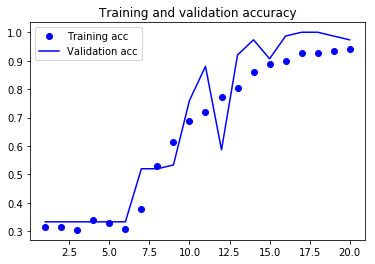

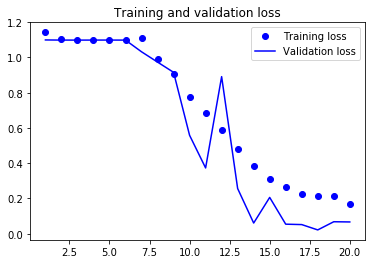

In [62]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

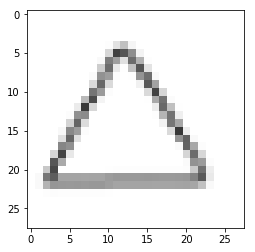

(1, 28, 28, 3)


In [64]:
img_path = 'data set/test/triangle/drawing(2).png'
img = image.load_img(img_path, target_size=(28, 28))

img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

In [69]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = classifier.predict_classes(images, batch_size=10)

print('expected classes:\n\ncircles: 0\nsqures: 1\ntriangles: 2')
print("\nPredicted class is:",classes)

expected classes:

circles: 0
squres: 1
triangles: 2

Predicted class is: [2]
